COOLING SCHEDULE COMPARISON: GEOMETRIC vs LUNDY-MEES
Geometric: T_{k+1} = α · T_k
Where: α = (T_final/T_initial)^(1/(K-1))
Lundy-Mees: T_{k+1} = T_k / (1 + β · T_k)
Where: β = (T_initial - T_final) / ((K-1) · T_initial · T_final)
Fixed: T_initial = 200, T_final = 1
Cooling ratio: 0.005
------------------------------------------------------------


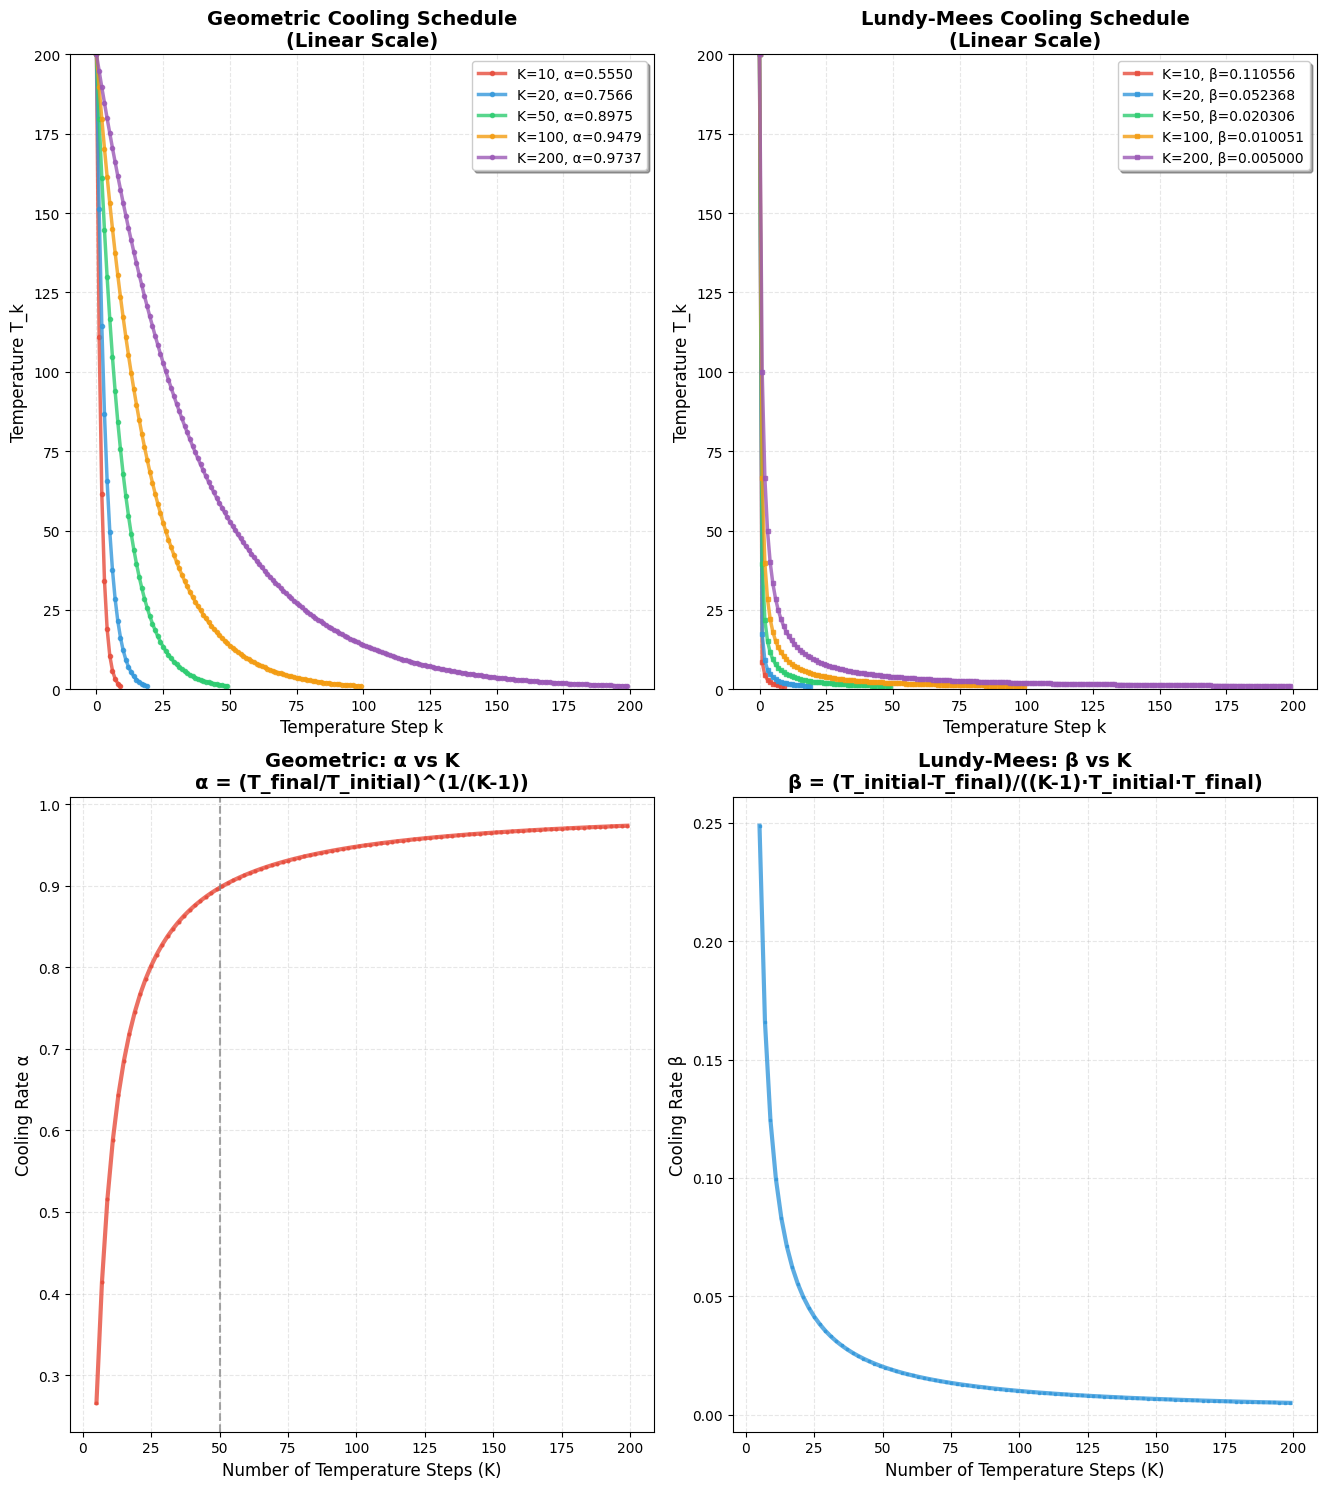


COMPARATIVE ANALYSIS: GEOMETRIC vs LUNDY-MEES
  K |  Geometric α |        L-M β |  Geo Final T |  L-M Final T |     Diff
------------------------------------------------------------------------------------------
  5 |   0.26591479 |   0.24875000 |     1.000000 |     1.000000 | 0.000000
 10 |   0.55504731 |   0.11055556 |     1.000000 |     1.000000 | 0.000000
 20 |   0.75664673 |   0.05236842 |     1.000000 |     1.000000 | 0.000000
 50 |   0.89751188 |   0.02030612 |     1.000000 |     1.000000 | 0.000000
100 |   0.94788854 |   0.01005051 |     1.000000 |     1.000000 | 0.000000
200 |   0.97372660 |   0.00500000 |     1.000000 |     1.000000 | 0.000000

TEMPERATURE DISTRIBUTION ANALYSIS (K=50)
Step |    Geometric |   Lundy-Mees |    Geo Δ |    L-M Δ
--------------------------------------------------------------------------------
   0 |   200.000000 |   200.000000 | 0.000000 | 0.000000
   1 |   179.502375 |    39.516129 | 20.497625 | 160.483871
   2 |   161.105514 |    21.923937 | 18.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set up plotting style
plt.style.use('default')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

def calculate_alpha(T_initial, T_final, K):
    """Calculate alpha for geometric cooling schedule: α = (T_final/T_initial)^(1/(K-1))"""
    return (T_final / T_initial) ** (1 / (K - 1))

def calculate_beta_lundy_mees(T_initial, T_final, K):
    """Calculate beta for Lundy-Mees cooling schedule: β = (T_initial - T_final) / ((K-1) * T_initial * T_final)"""
    return (T_initial - T_final) / ((K - 1) * T_initial * T_final)

def geometric_cooling_schedule(T_initial, alpha, K):
    """Generate temperature sequence using geometric cooling: T_{k+1} = α · T_k"""
    temperatures = [T_initial]
    T_current = T_initial
    
    for k in range(1, K):
        T_current = alpha * T_current
        temperatures.append(T_current)
    
    return np.array(temperatures)

def lundy_mees_cooling_schedule(T_initial, beta, K):
    """Generate temperature sequence using Lundy-Mees cooling: T_{k+1} = T_k / (1 + β * T_k)"""
    temperatures = [T_initial]
    T_current = T_initial
    
    for k in range(1, K):
        T_current = T_current / (1 + beta * T_current)
        temperatures.append(T_current)
    
    return np.array(temperatures)

# Fixed parameters from your research
T_initial = 200
T_final = 1
cooling_ratio = T_final / T_initial

print("COOLING SCHEDULE COMPARISON: GEOMETRIC vs LUNDY-MEES")
print("="*60)
print(f"Geometric: T_{{k+1}} = α · T_k")
print(f"Where: α = (T_final/T_initial)^(1/(K-1))")
print(f"Lundy-Mees: T_{{k+1}} = T_k / (1 + β · T_k)")
print(f"Where: β = (T_initial - T_final) / ((K-1) · T_initial · T_final)")
print(f"Fixed: T_initial = {T_initial}, T_final = {T_final}")
print(f"Cooling ratio: {cooling_ratio}")
print("-" * 60)

# Different K values to show alpha effect
K_values = [10, 20, 50, 100, 200]
colors = ['#E74C3C', '#3498DB', '#2ECC71', '#F39C12', '#9B59B6']

# Create main comparison plot
fig = plt.figure(figsize=(20, 15))

# Plot 1: Linear scale comparison - Geometric vs Lundy-Mees
ax1 = plt.subplot(2, 3, 1)
for K, color in zip(K_values, colors):
    alpha = calculate_alpha(T_initial, T_final, K)
    temperatures = geometric_cooling_schedule(T_initial, alpha, K)
    iterations = np.arange(K)
    
    ax1.plot(iterations, temperatures, 'o-', color=color,
             label=f'K={K}, α={alpha:.4f}', linewidth=2.5, markersize=3, alpha=0.8)

ax1.set_xlabel('Temperature Step k', fontsize=12)
ax1.set_ylabel('Temperature T_k', fontsize=12)
ax1.set_title('Geometric Cooling Schedule\n(Linear Scale)', 
              fontsize=14, fontweight='bold')
ax1.legend(frameon=True, fancybox=True, shadow=True)
ax1.grid(True, alpha=0.3, linestyle='--')
ax1.set_ylim(0, 200)

# Plot 2: Linear scale - Lundy-Mees
ax2 = plt.subplot(2, 3, 2)
for K, color in zip(K_values, colors):
    beta = calculate_beta_lundy_mees(T_initial, T_final, K)
    temperatures = lundy_mees_cooling_schedule(T_initial, beta, K)
    iterations = np.arange(K)
    
    ax2.plot(iterations, temperatures, 's-', color=color,
             label=f'K={K}, β={beta:.6f}', linewidth=2.5, markersize=3, alpha=0.8)

ax2.set_xlabel('Temperature Step k', fontsize=12)
ax2.set_ylabel('Temperature T_k', fontsize=12)
ax2.set_title('Lundy-Mees Cooling Schedule\n(Linear Scale)', 
              fontsize=14, fontweight='bold')
ax2.legend(frameon=True, fancybox=True, shadow=True)
ax2.grid(True, alpha=0.3, linestyle='--')
ax2.set_ylim(0, 200)

# # Plot 3: Direct comparison - both methods
# ax3 = plt.subplot(2, 3, 3)
# K_demo = 50
# alpha_demo = calculate_alpha(T_initial, T_final, K_demo)
# beta_demo = calculate_beta_lundy_mees(T_initial, T_final, K_demo)
# temp_geo = geometric_cooling_schedule(T_initial, alpha_demo, K_demo)
# temp_lm = lundy_mees_cooling_schedule(T_initial, beta_demo, K_demo)
# iterations = np.arange(K_demo)

# ax3.plot(iterations, temp_geo, 'o-', color='#E74C3C', 
#          label=f'Geometric (α={alpha_demo:.4f})', linewidth=3, markersize=4, alpha=0.8)
# ax3.plot(iterations, temp_lm, 's-', color='#3498DB',
#          label=f'Lundy-Mees (β={beta_demo:.6f})', linewidth=3, markersize=4, alpha=0.8)

# ax3.set_xlabel('Temperature Step k', fontsize=12)
# ax3.set_ylabel('Temperature T_k', fontsize=12)
# ax3.set_title(f'Direct Comparison (K={K_demo})\nLinear Scale', 
#               fontsize=14, fontweight='bold')
# ax3.legend(frameon=True, fancybox=True, shadow=True)
# ax3.grid(True, alpha=0.3, linestyle='--')
# ax3.set_ylim(0, 200)

# # Plot 4: Alpha vs K relationship (Geometric)
# ax4 = plt.subplot(2, 3, 4)
# K_range = np.arange(5, 201, 2)
# alpha_values = [calculate_alpha(T_initial, T_final, K) for K in K_range]

# ax4.plot(K_range, alpha_values, 'o-', color='#E74C3C', linewidth=3, 
#          markersize=2, alpha=0.8)
# ax4.set_xlabel('Number of Temperature Steps (K)', fontsize=12)
# ax4.set_ylabel('Cooling Rate α', fontsize=12)
# ax4.set_title('Geometric: α vs K\nα = (T_final/T_initial)^(1/(K-1))', 
#               fontsize=14, fontweight='bold')
# ax4.grid(True, alpha=0.3, linestyle='--')

# ax4.axvline(x=50, color='gray', linestyle='--', linewidth=1.5, alpha=0.7)

# # Plot 5: Beta vs K relationship (Lundy-Mees)
# ax5 = plt.subplot(2, 3, 5)
# beta_values = [calculate_beta_lundy_mees(T_initial, T_final, K) for K in K_range]

# ax5.plot(K_range, beta_values, 's-', color='#3498DB', linewidth=3, 
#          markersize=2, alpha=0.8)
# ax5.set_xlabel('Number of Temperature Steps (K)', fontsize=12)
# ax5.set_ylabel('Cooling Rate β', fontsize=12)
# ax5.set_title('Lundy-Mees: β vs K\nβ = (T_initial-T_final)/((K-1)·T_initial·T_final)', 
#               fontsize=14, fontweight='bold')
# ax5.grid(True, alpha=0.3, linestyle='--')

# # Plot 6: Log scale comparison
# ax6 = plt.subplot(2, 3, 6)
# K_demo = 100
# alpha_demo = calculate_alpha(T_initial, T_final, K_demo)
# beta_demo = calculate_beta_lundy_mees(T_initial, T_final, K_demo)
# temp_geo = geometric_cooling_schedule(T_initial, alpha_demo, K_demo)
# temp_lm = lundy_mees_cooling_schedule(T_initial, beta_demo, K_demo)
# iterations = np.arange(K_demo)

# ax6.plot(iterations, temp_geo, 'o-', color='#E74C3C', 
#          label=f'Geometric (α={alpha_demo:.4f})', linewidth=2.5, markersize=3, alpha=0.8)
# ax6.plot(iterations, temp_lm, 's-', color='#3498DB',
#          label=f'Lundy-Mees (β={beta_demo:.6f})', linewidth=2.5, markersize=3, alpha=0.8)

# ax6.set_xlabel('Temperature Step k', fontsize=12)
# ax6.set_ylabel('Temperature T_k', fontsize=12)
# ax6.set_title(f'Direct Comparison (K={K_demo})\nLog Scale', 
#               fontsize=14, fontweight='bold')
# ax6.legend(frameon=True, fancybox=True, shadow=True)
# ax6.grid(True, alpha=0.3, linestyle='--')
# ax6.set_yscale('log')

plt.tight_layout()
plt.show()

# Comparative analysis
print("\n" + "="*90)
print("COMPARATIVE ANALYSIS: GEOMETRIC vs LUNDY-MEES")
print("="*90)
print(f"{'K':>3} | {'Geometric α':>12} | {'L-M β':>12} | {'Geo Final T':>12} | {'L-M Final T':>12} | {'Diff':>8}")
print("-" * 90)

for K in [5, 10, 20, 50, 100, 200]:
    alpha = calculate_alpha(T_initial, T_final, K)
    beta = calculate_beta_lundy_mees(T_initial, T_final, K)
    
    temp_geo = geometric_cooling_schedule(T_initial, alpha, K)
    temp_lm = lundy_mees_cooling_schedule(T_initial, beta, K)
    
    final_T_geo = temp_geo[-1]
    final_T_lm = temp_lm[-1]
    diff = abs(final_T_geo - final_T_lm)
    
    print(f"{K:3d} | {alpha:12.8f} | {beta:12.8f} | {final_T_geo:12.6f} | {final_T_lm:12.6f} | {diff:8.6f}")

# Temperature distribution analysis
print(f"\n" + "="*80)
print("TEMPERATURE DISTRIBUTION ANALYSIS (K=50)")
print("="*80)

K_analysis = 50
alpha_analysis = calculate_alpha(T_initial, T_final, K_analysis)
beta_analysis = calculate_beta_lundy_mees(T_initial, T_final, K_analysis)
temp_geo_analysis = geometric_cooling_schedule(T_initial, alpha_analysis, K_analysis)
temp_lm_analysis = lundy_mees_cooling_schedule(T_initial, beta_analysis, K_analysis)

print(f"{'Step':>4} | {'Geometric':>12} | {'Lundy-Mees':>12} | {'Geo Δ':>8} | {'L-M Δ':>8}")
print("-" * 80)

for i in range(0, min(15, K_analysis)):  # Show first 15 steps
    if i == 0:
        geo_delta = 0
        lm_delta = 0
    else:
        geo_delta = temp_geo_analysis[i-1] - temp_geo_analysis[i]
        lm_delta = temp_lm_analysis[i-1] - temp_lm_analysis[i]
    
    print(f"{i:4d} | {temp_geo_analysis[i]:12.6f} | {temp_lm_analysis[i]:12.6f} | {geo_delta:8.6f} | {lm_delta:8.6f}")

print(f"\nKey insights:")
print(f"• Geometric cooling: Constant percentage decrease (multiplicative)")
print(f"• Lundy-Mees cooling: Variable percentage decrease (depends on current temperature)")
print(f"• Both reach approximately T_final = {T_final} after K steps")
print(f"• Geometric provides more predictable cooling behavior")
print(f"• Lundy-Mees cooling rate slows down as temperature decreases")